# Exploring Data

In [1]:
import pandas as pd
from plotnine import ggplot, aes, geom_line, geom_point, labs, theme_minimal, theme, element_blank, geom_density, \
    geom_bar, geom_histogram, geom_col, geom_smooth
from plotnine import element_text



In [2]:
mySpotifyData = pd.read_csv('merged_streaming_history.csv',low_memory=False)
mySpotifyData.tail()

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
223988,2024-04-11T21:57:01Z,fesapien,ios,1700,US,128.210.106.76,unknown,Rockstar Lifestyle,Ken Carson,A Great Chaos,...,NaN,NaN,NaN,fwdbtn,fwdbtn,True,True,False,1712872620,False
223989,2024-04-11T21:57:06Z,fesapien,ios,5960,US,128.210.106.76,unknown,Blew My High,Chief Keef,Almighty So,...,NaN,NaN,NaN,fwdbtn,fwdbtn,True,True,False,1712872621,False
223990,2024-04-11T21:57:07Z,fesapien,ios,950,US,128.210.106.76,unknown,NaN,NaN,NaN,...,NaN,NaN,NaN,fwdbtn,fwdbtn,True,True,False,1712872627,False
223991,2024-04-11T21:57:46Z,fesapien,ios,38020,US,128.210.106.76,unknown,I Can Show You,Lil Uzi Vert,Eternal Atake (Deluxe) - LUV vs. The World 2,...,NaN,NaN,NaN,fwdbtn,fwdbtn,True,True,False,1712872628,False
223992,2024-04-11T23:01:40Z,fesapien,ios,129700,US,128.210.106.76,unknown,Mileage (feat. Chief Keef),Playboi Carti,Die Lit,...,NaN,NaN,NaN,fwdbtn,logout,True,False,False,1712872666,False


In [3]:
mySpotifyData.drop(columns=['username', 'user_agent_decrypted','episode_name','episode_show_name','spotify_episode_uri','offline_timestamp','incognito_mode','offline'], inplace=True)


In [4]:
mySpotifyData.tail()

,ts,platform,ms_played,conn_country,ip_addr_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,reason_start,reason_end,shuffle,skipped
223988,2024-04-11T21:57:01Z,ios,1700,US,128.210.106.76,Rockstar Lifestyle,Ken Carson,A Great Chaos,spotify:track:5I8LS9jiW5xju1lzakh1s3,fwdbtn,fwdbtn,True,True
223989,2024-04-11T21:57:06Z,ios,5960,US,128.210.106.76,Blew My High,Chief Keef,Almighty So,spotify:track:3lVPIF8KoWHrzRUGEp4v97,fwdbtn,fwdbtn,True,True
223990,2024-04-11T21:57:07Z,ios,950,US,128.210.106.76,NaN,NaN,NaN,NaN,fwdbtn,fwdbtn,True,True
223991,2024-04-11T21:57:46Z,ios,38020,US,128.210.106.76,I Can Show You,Lil Uzi Vert,Eternal Atake (Deluxe) - LUV vs. The World 2,spotify:track:0AhJag7VI8uFf3mJFsTwvf,fwdbtn,fwdbtn,True,True
223992,2024-04-11T23:01:40Z,ios,129700,US,128.210.106.76,Mileage (feat. Chief Keef),Playboi Carti,Die Lit,spotify:track:1oNcc2isuz7d3hc1fMoHqj,fwdbtn,logout,True,False


In [5]:
mySpotifyData['ts'] = pd.to_datetime(mySpotifyData['ts'])
mySpotifyData['day'] = mySpotifyData['ts'].dt.day
mySpotifyData['month'] = mySpotifyData['ts'].dt.month
mySpotifyData['year'] = mySpotifyData['ts'].dt.year
mySpotifyData['hour'] = mySpotifyData['ts'].dt.hour
mySpotifyData['monthYear'] = mySpotifyData['ts'].dt.to_period('M')
mySpotifyData['weekday'] = mySpotifyData['ts'].dt.day_name()

/var/folders/k_/r0zrmw792qj2fkbjv8vnzxgw0000gn/T/ipykernel_57849/3767404903.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.


In [6]:
mySpotifyData.tail()

,ts,platform,ms_played,conn_country,ip_addr_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,reason_start,reason_end,shuffle,skipped,day,month,year,hour,monthYear,weekday
223988,2024-04-11 21:57:01+00:00,ios,1700,US,128.210.106.76,Rockstar Lifestyle,Ken Carson,A Great Chaos,spotify:track:5I8LS9jiW5xju1lzakh1s3,fwdbtn,fwdbtn,True,True,11,4,2024,21,2024-04,Thursday
223989,2024-04-11 21:57:06+00:00,ios,5960,US,128.210.106.76,Blew My High,Chief Keef,Almighty So,spotify:track:3lVPIF8KoWHrzRUGEp4v97,fwdbtn,fwdbtn,True,True,11,4,2024,21,2024-04,Thursday
223990,2024-04-11 21:57:07+00:00,ios,950,US,128.210.106.76,NaN,NaN,NaN,NaN,fwdbtn,fwdbtn,True,True,11,4,2024,21,2024-04,Thursday
223991,2024-04-11 21:57:46+00:00,ios,38020,US,128.210.106.76,I Can Show You,Lil Uzi Vert,Eternal Atake (Deluxe) - LUV vs. The World 2,spotify:track:0AhJag7VI8uFf3mJFsTwvf,fwdbtn,fwdbtn,True,True,11,4,2024,21,2024-04,Thursday
223992,2024-04-11 23:01:40+00:00,ios,129700,US,128.210.106.76,Mileage (feat. Chief Keef),Playboi Carti,Die Lit,spotify:track:1oNcc2isuz7d3hc1fMoHqj,fwdbtn,logout,True,False,11,4,2024,23,2024-04,Thursday


/var/folders/k_/r0zrmw792qj2fkbjv8vnzxgw0000gn/T/ipykernel_57849/3015265037.py:13: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


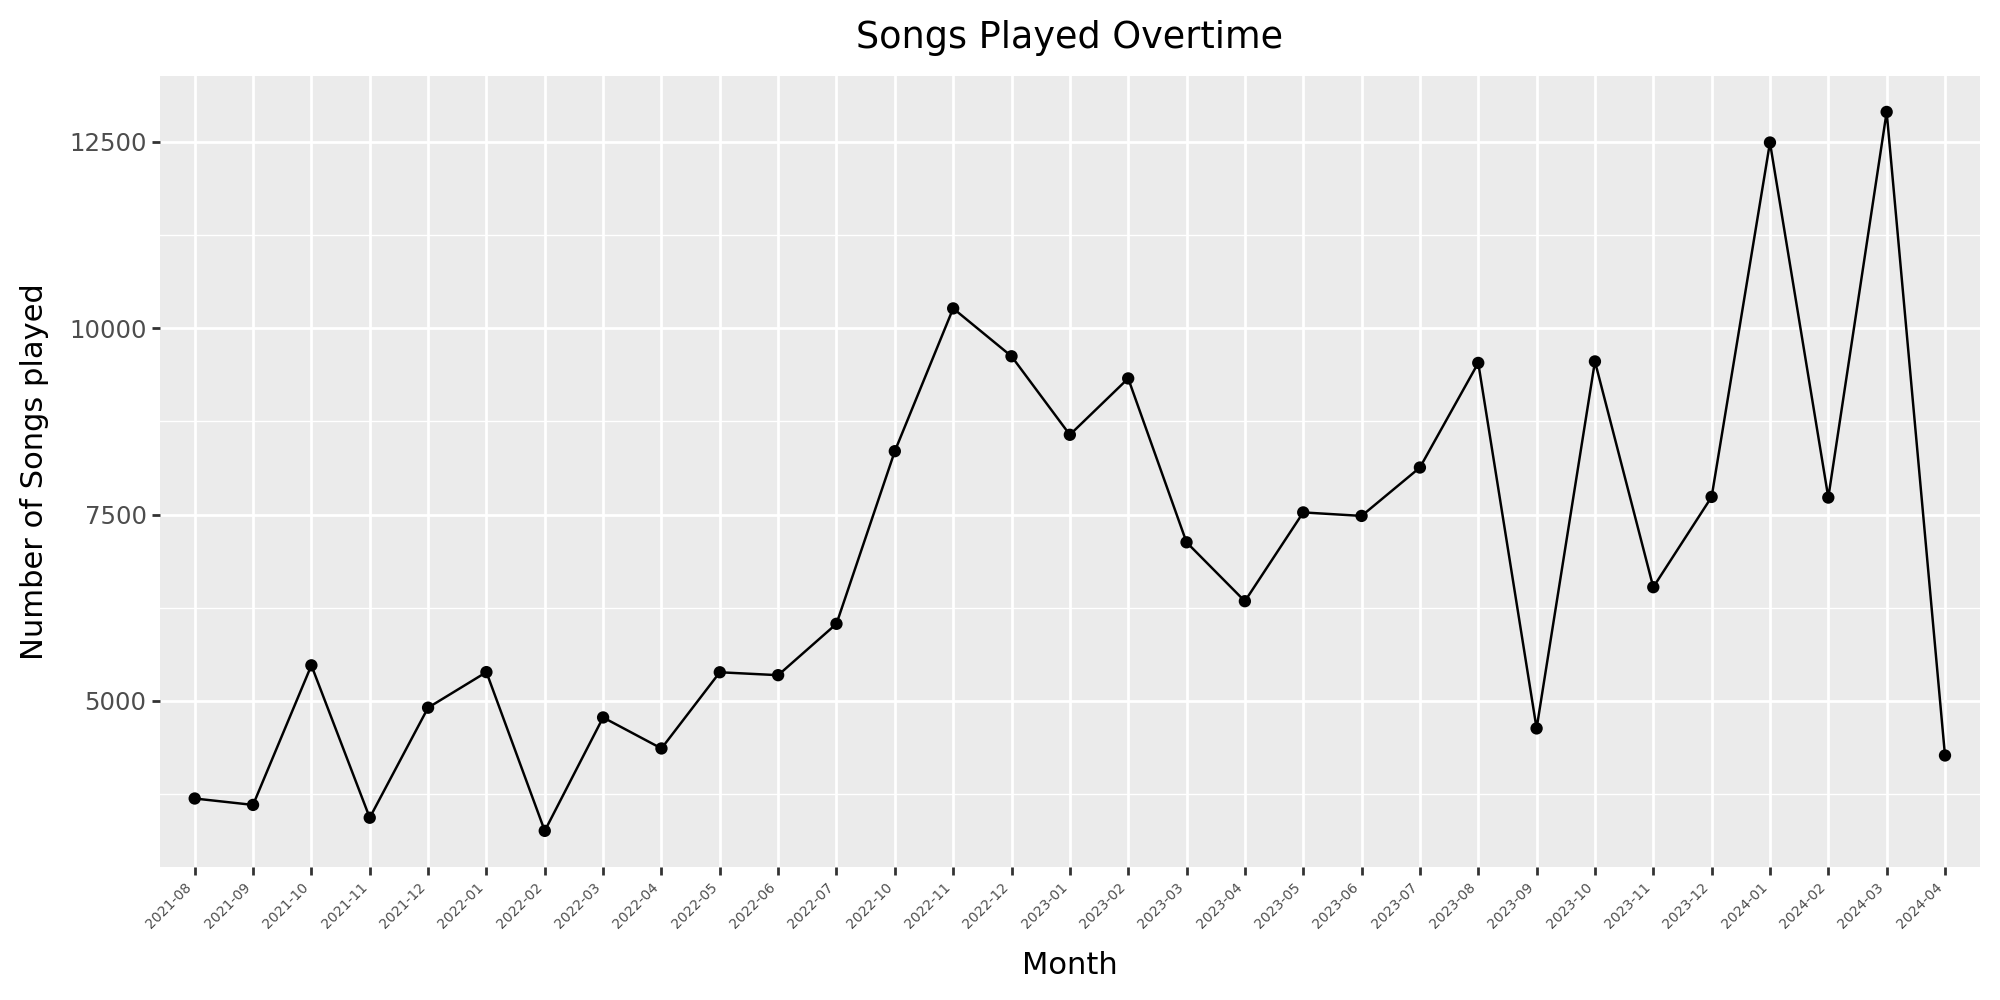

In [7]:
#Starting using Spotify during this time
mySpotifyDataFiltered = mySpotifyData[mySpotifyData['ts'] >= '2021-08-01']

songsPlayed = mySpotifyDataFiltered.groupby(['monthYear']).size().reset_index(name='totalSongs')

plot = (ggplot(songsPlayed, aes(x='monthYear', y='totalSongs', group = 1))
         + geom_point()
         + geom_line()
         + labs(title= "Songs Played Overtime",
                x='Month',
                y='Number of Songs played') + theme(figure_size=(10, 5),
                axis_text_x=element_text(rotation=45, hjust=1, size = 5)))
print(plot)

/var/folders/k_/r0zrmw792qj2fkbjv8vnzxgw0000gn/T/ipykernel_57849/1974136103.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/var/folders/k_/r0zrmw792qj2fkbjv8vnzxgw0000gn/T/ipykernel_57849/1974136103.py:11: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


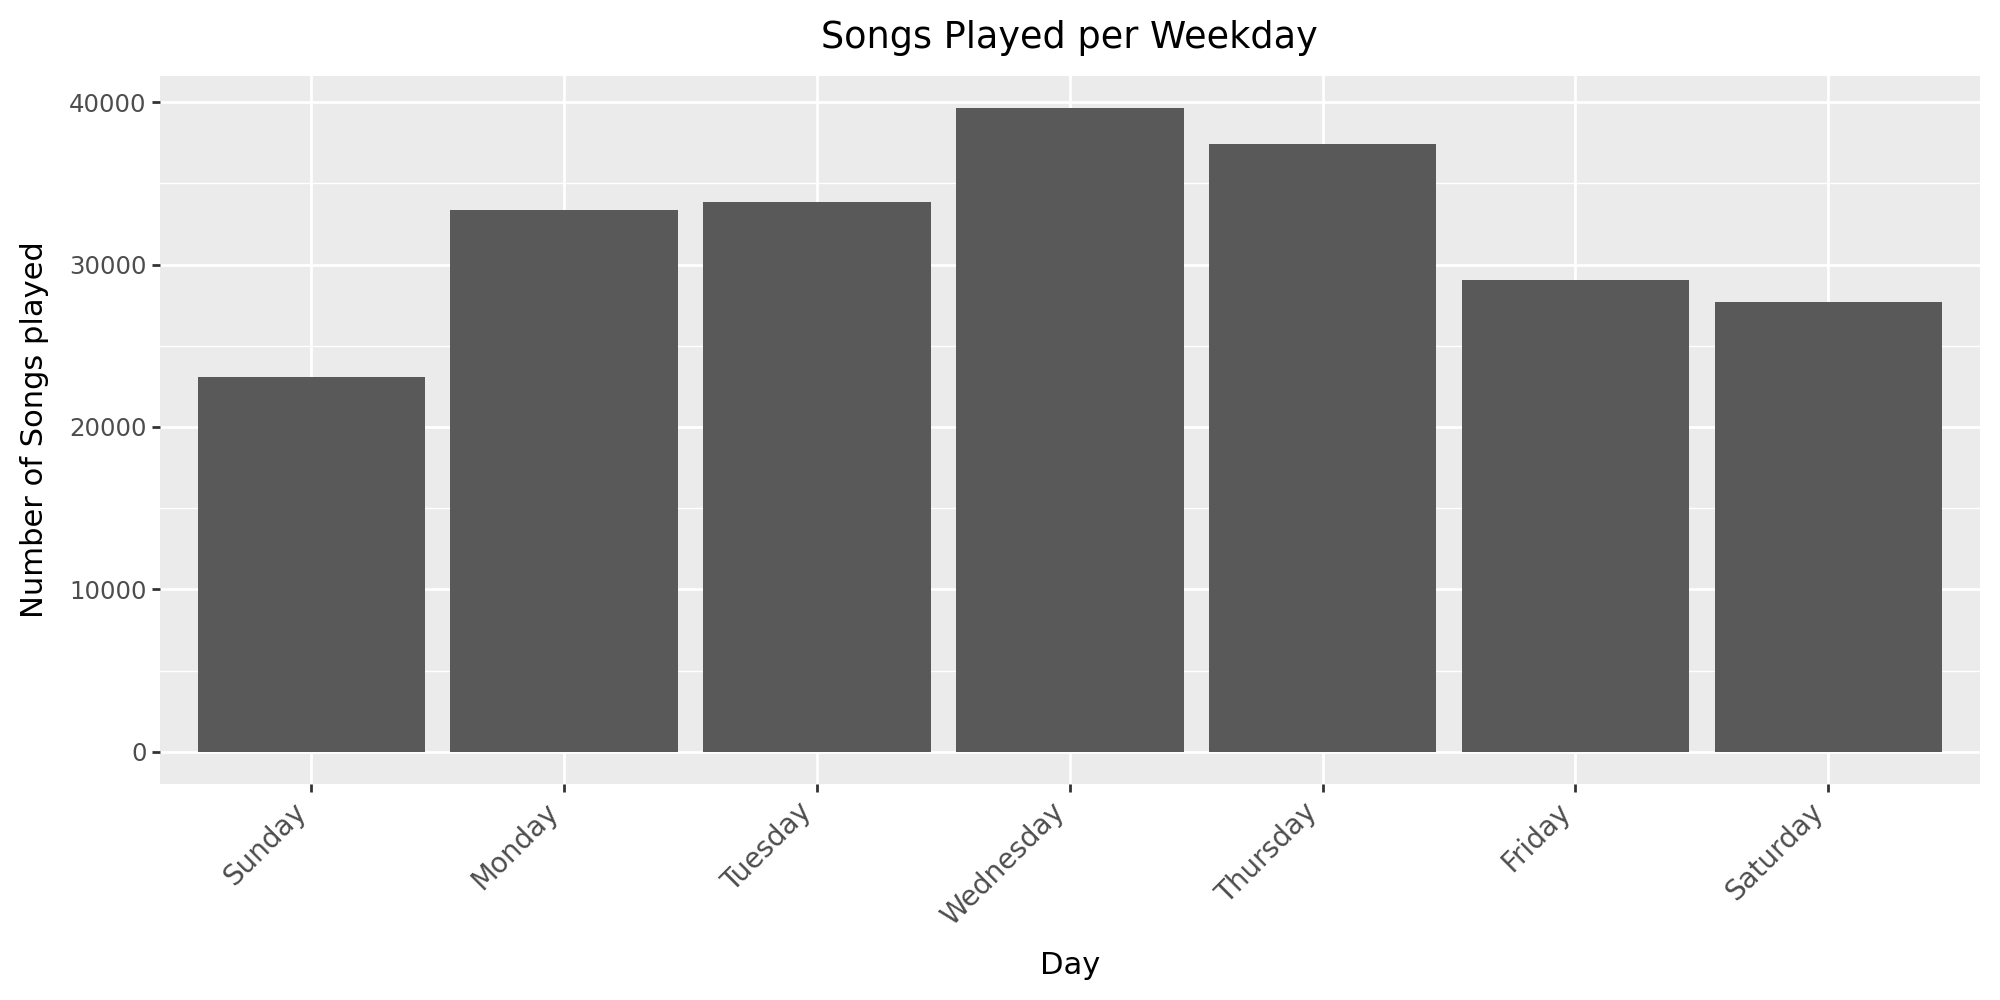

In [8]:
weekday_order = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
mySpotifyData['weekday'] = pd.Categorical(mySpotifyData['weekday'], categories=weekday_order, ordered=True)
songsPlayedWeekday = mySpotifyData.groupby(['weekday']).size().reset_index(name='totalSongs')
plotperDay = (ggplot(songsPlayedWeekday, aes(x='weekday', y='totalSongs'))
              + geom_bar(stat='identity')
              + labs(title="Songs Played per Weekday",
                     x='Day',
                     y='Number of Songs played')
              + theme(figure_size=(10, 5),
                      axis_text_x=element_text(rotation=45, hjust=1, size=10)))
print(plotperDay)

/var/folders/k_/r0zrmw792qj2fkbjv8vnzxgw0000gn/T/ipykernel_57849/869458157.py:9: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


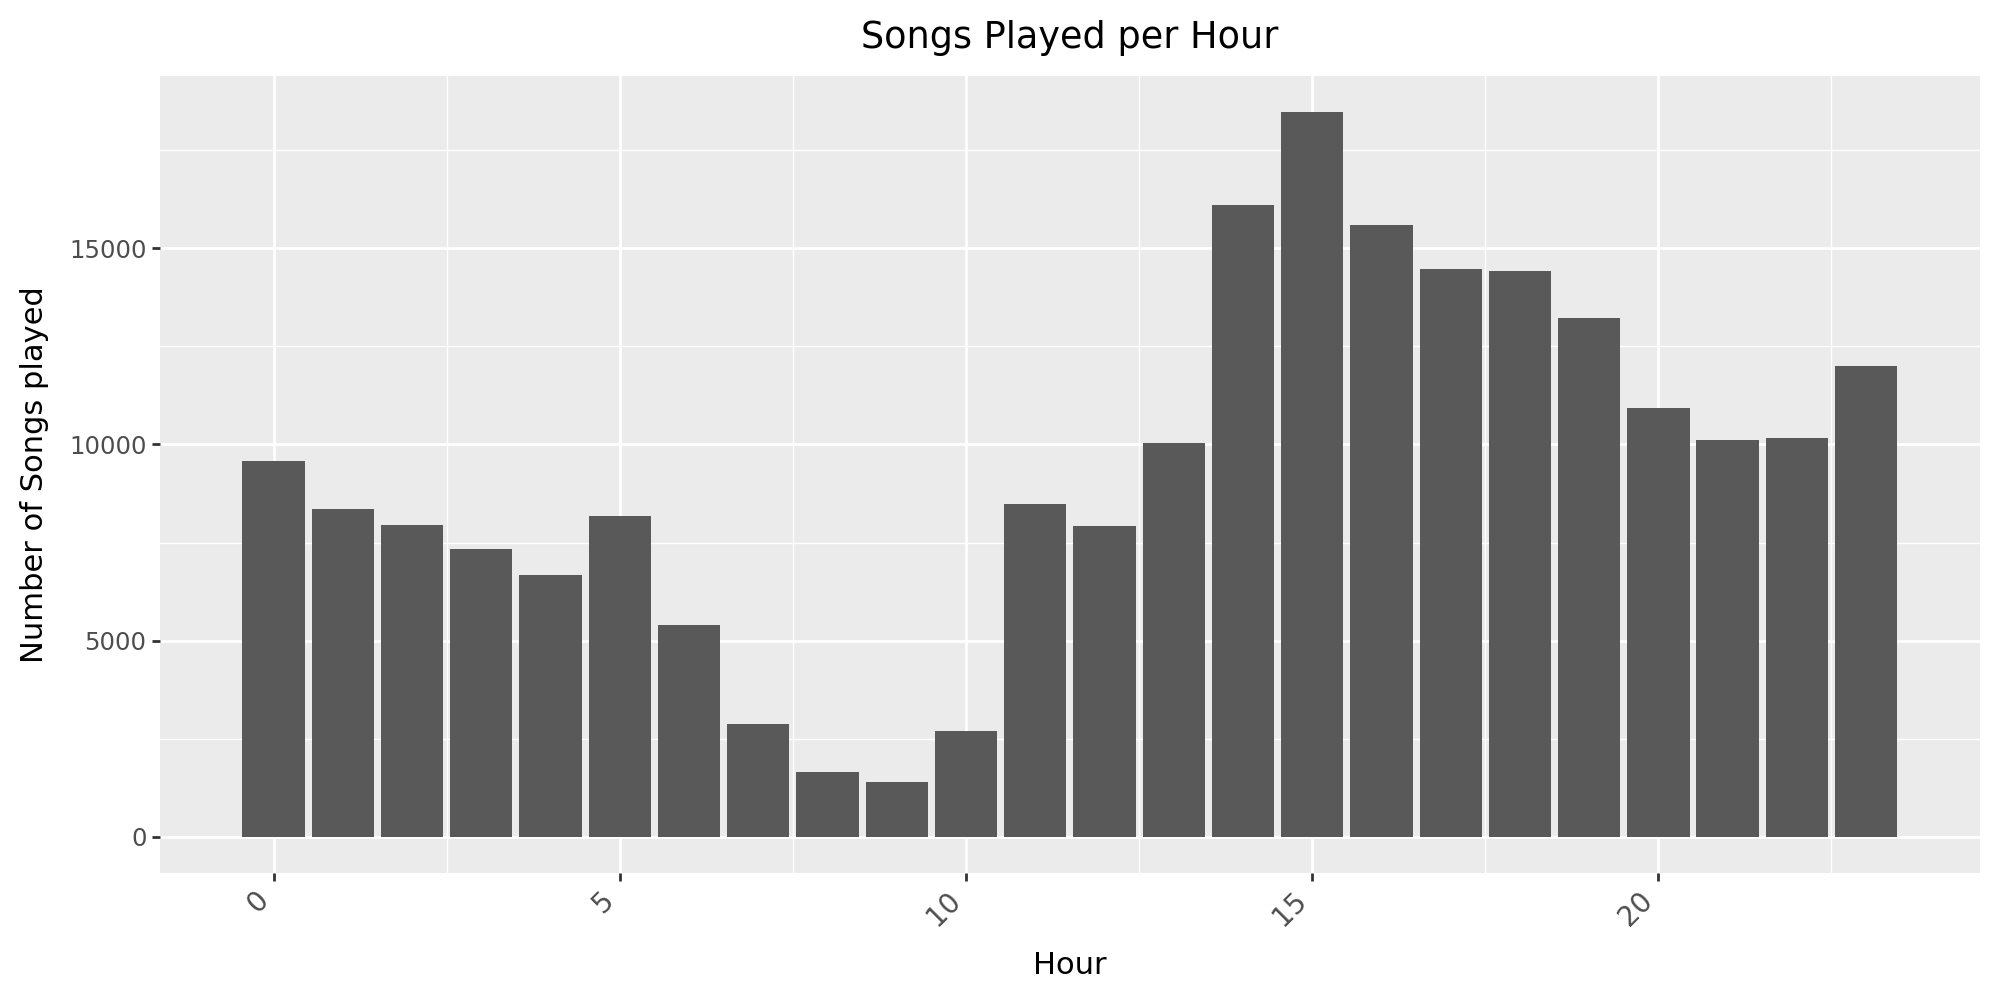

In [9]:
songsPlayedPerHour = mySpotifyData.groupby(['hour']).size().reset_index(name='totalSongs')
plotperHour = (ggplot(songsPlayedPerHour, aes(x='hour', y='totalSongs'))
              + geom_bar(stat='identity')
              + labs(title="Songs Played per Hour",
                     x='Hour',
                     y='Number of Songs played')
              + theme(figure_size=(10, 5),
                      axis_text_x=element_text(rotation=45, hjust=1, size=10)))
print(plotperHour)

/var/folders/k_/r0zrmw792qj2fkbjv8vnzxgw0000gn/T/ipykernel_57849/2828604340.py:11: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/Users/ram/anaconda3/lib/python3.11/site-packages/plotnine/geoms/geom_path.py:113: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


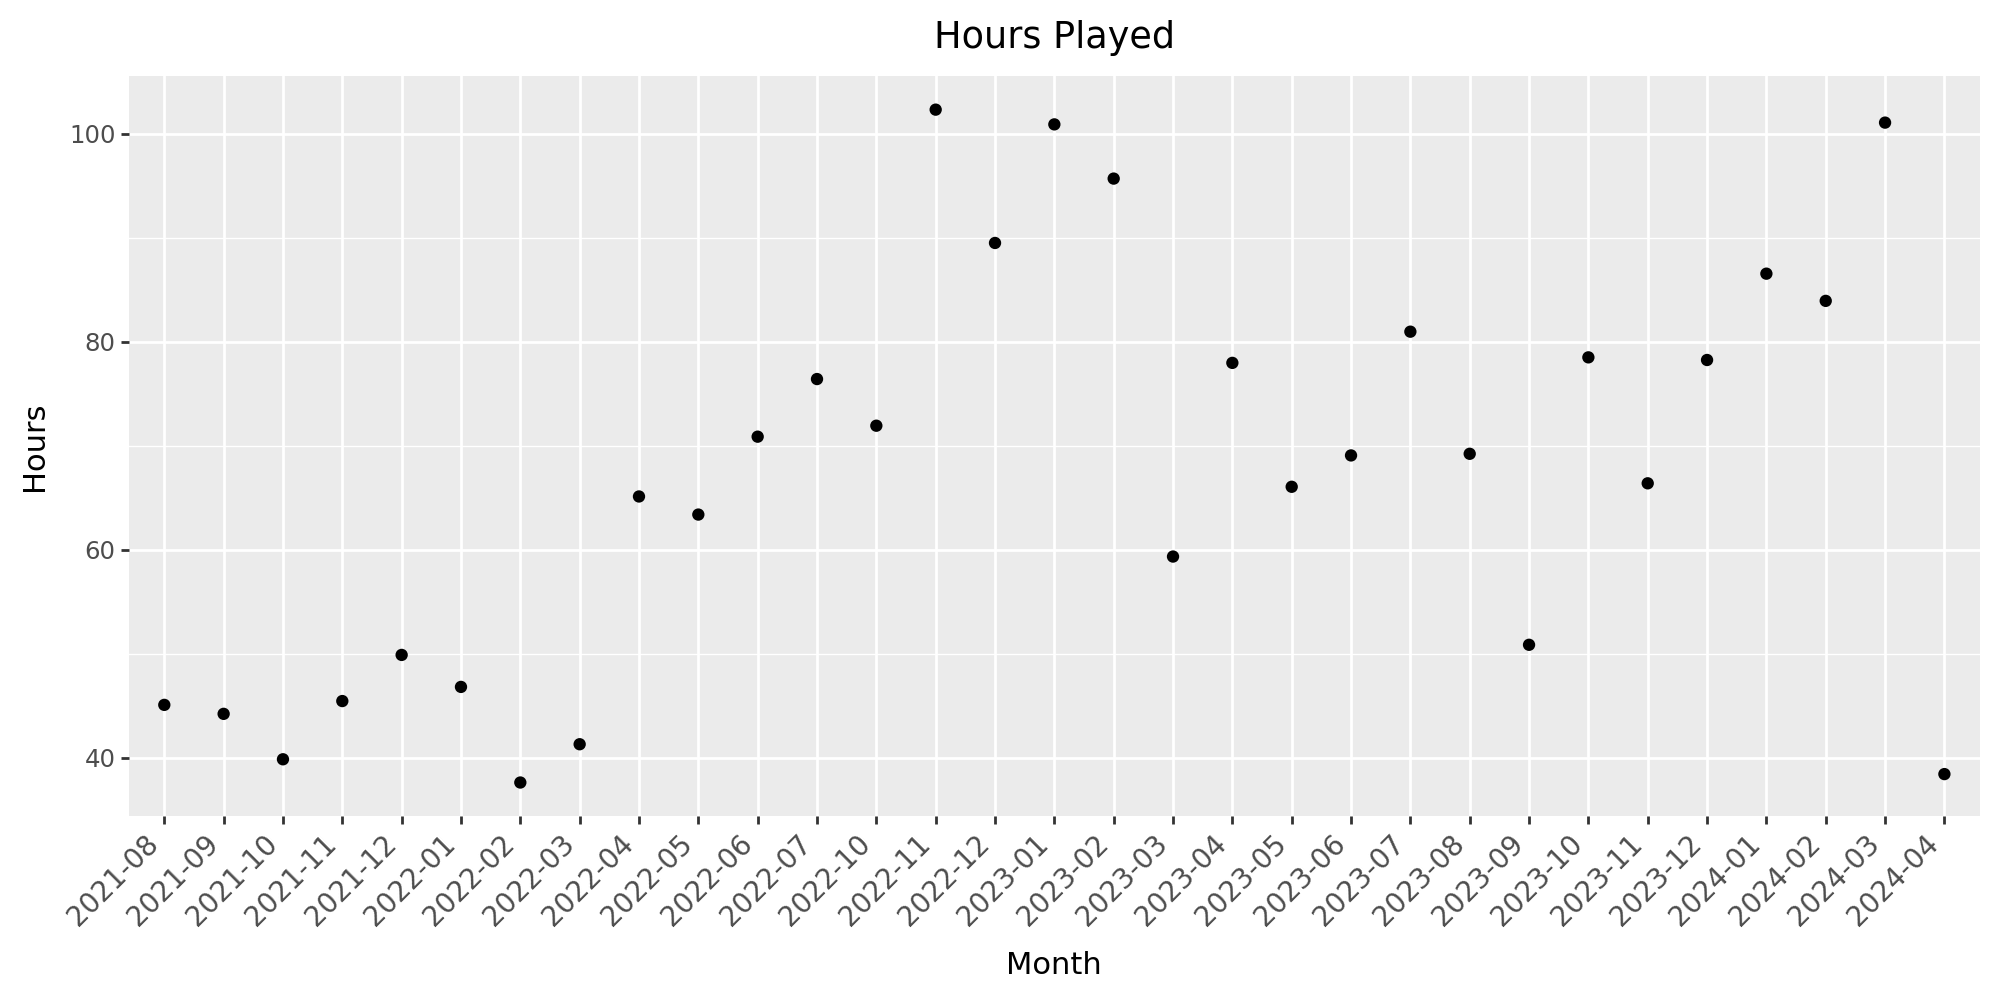

In [10]:
msPlayed =mySpotifyDataFiltered.groupby(['monthYear'])['ms_played'].sum().reset_index(name='totalMsPlayed')
msPlayed['totalMsPlayed'] = msPlayed['totalMsPlayed'].div(3600000)
plotperTime = (ggplot(msPlayed, aes(x='monthYear', y='totalMsPlayed'))
              + geom_point()
              + geom_line()
              + labs(title="Hours Played",
                     x='Month',
                     y='Hours')
              + theme(figure_size=(10, 5),
                      axis_text_x=element_text(rotation=45, hjust=1, size=10)))
print(plotperTime)

# Most Played Artists/Songs

In [11]:
mostPlayedSongs = mySpotifyData['master_metadata_track_name'].value_counts()

In [12]:
print(mostPlayedSongs[:10])

master_metadata_track_name
Stop Breathing                                949
Rockstar Made                                 857
Over                                          804
New Tank                                      736
R.I.P.                                        655
Let It Go                                     623
Rock N Roll                                   579
Nightcrawler (feat. Swae Lee & Chief Keef)    538
VTMNTSCOAT                                    531
5unna                                         520
Name: count, dtype: int64


In [13]:
mostPlayedArtists = mySpotifyData['master_metadata_album_artist_name'].value_counts()

In [14]:
print(mostPlayedArtists[:5])

master_metadata_album_artist_name
Playboi Carti     19286
Lil Uzi Vert      16925
Travis Scott       8790
Ken Carson         8448
Destroy Lonely     7402
Name: count, dtype: int64


/var/folders/k_/r0zrmw792qj2fkbjv8vnzxgw0000gn/T/ipykernel_57849/2522804231.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/k_/r0zrmw792qj2fkbjv8vnzxgw0000gn/T/ipykernel_57849/2522804231.py:22: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


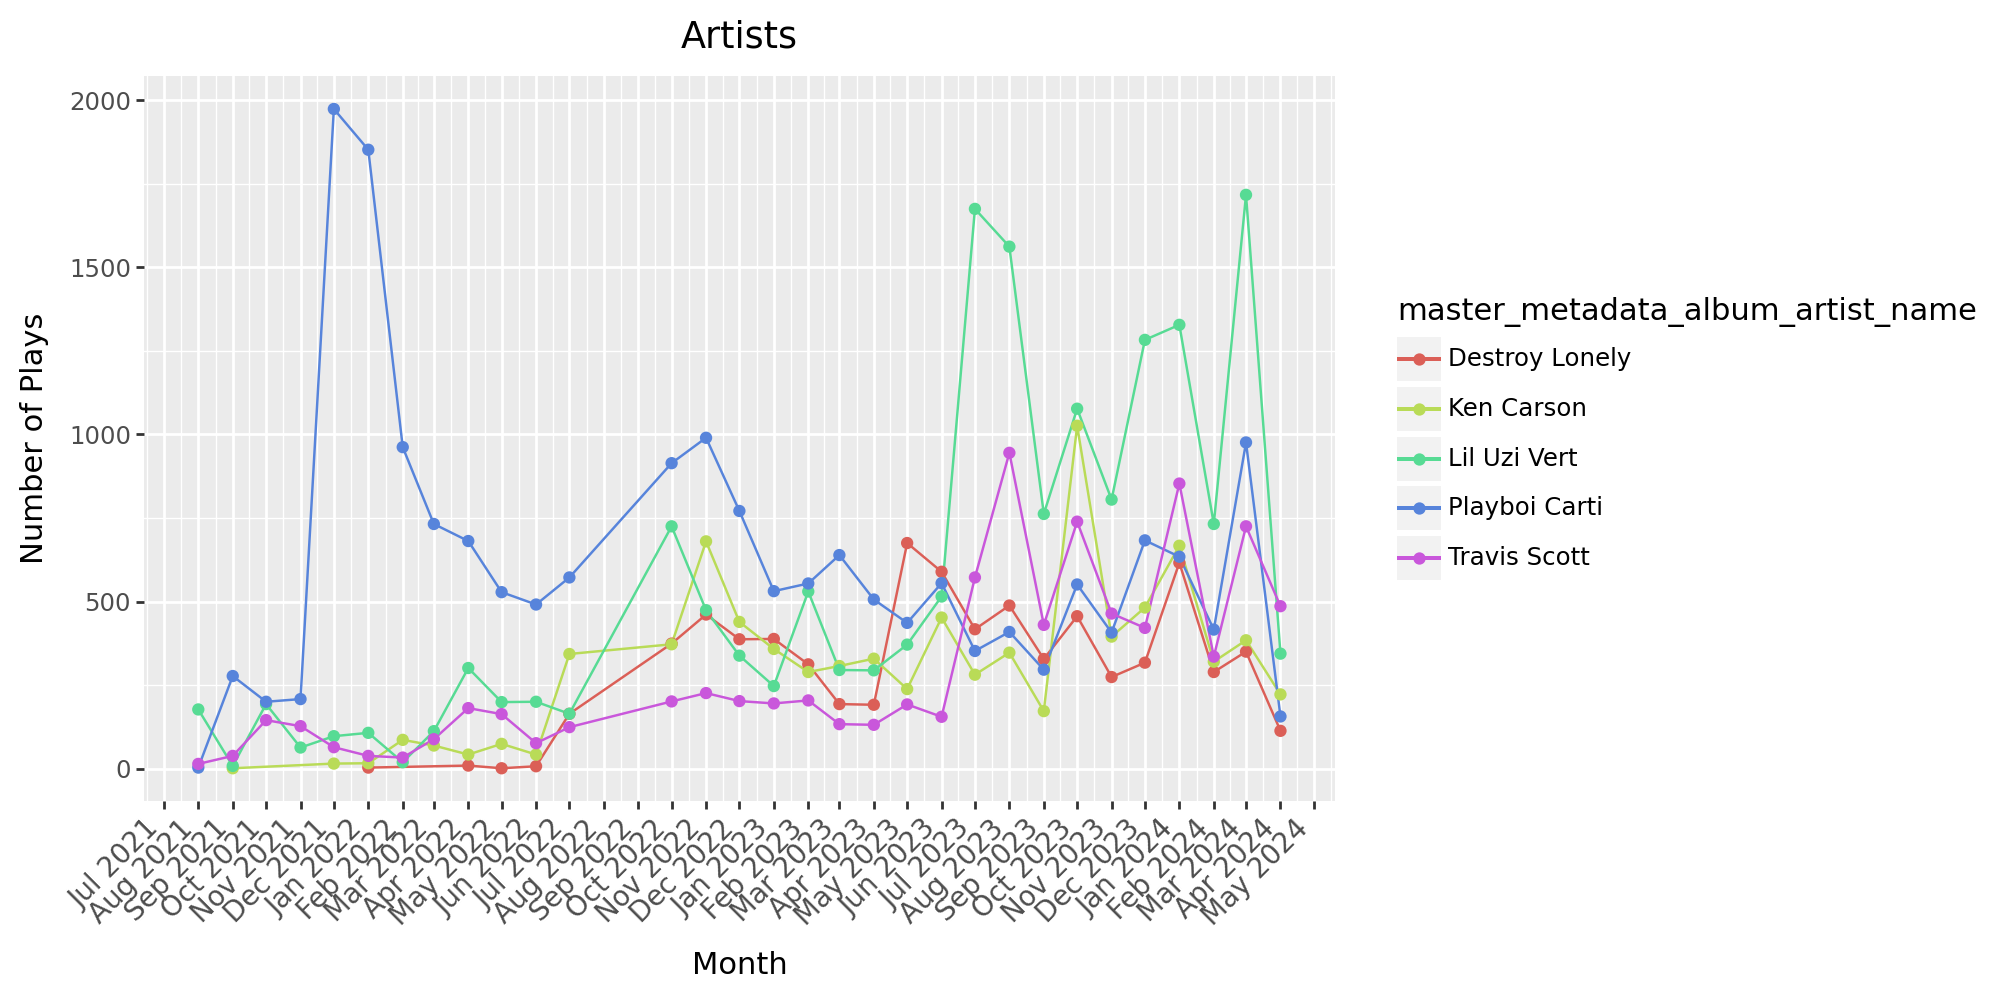

In [15]:
import pandas as pd
from plotnine import ggplot, aes, geom_line, geom_point, labs, theme, element_text, scale_x_datetime
from plotnine.themes import theme_minimal


mostPlayedArtists = mySpotifyData['master_metadata_album_artist_name'].value_counts()
artists = mostPlayedArtists.index[:5] 

artistPlays = mySpotifyDataFiltered.groupby(['monthYear', 'master_metadata_album_artist_name']).size().reset_index(name='playCount')

topArtists = artistPlays[artistPlays['master_metadata_album_artist_name'].isin(artists)]

topArtists['monthYear'] = pd.to_datetime(topArtists['monthYear'].dt.to_timestamp())

p = (ggplot(topArtists, aes(x='monthYear', y='playCount', color='master_metadata_album_artist_name'))
     + geom_line()
     + geom_point()
     + labs(title="Artists", x='Month', y='Number of Plays')
     + scale_x_datetime(date_breaks="1 month", date_labels="%b %Y")
     + theme(figure_size=(10, 5), axis_text_x=element_text(rotation=45, hjust=1, size=10)))

print(p)


In [16]:
msPlayed = mySpotifyData.groupby(['master_metadata_album_artist_name'])['ms_played'].sum().reset_index(name='totalMsPlayed')
msPlayed['hoursPlayed'] = msPlayed['totalMsPlayed'].div(3600000)
msPlayed = msPlayed.sort_values(by='hoursPlayed', ascending=False)
top10_artists = msPlayed.head(10)
print(top10_artists)



     master_metadata_album_artist_name  totalMsPlayed  hoursPlayed
2049                      Lil Uzi Vert      802277056   222.854738
2661                     Playboi Carti      789945467   219.429296
3572                      Travis Scott      363343957   100.928877
1820                        Ken Carson      336498332    93.471759
1791                        Kanye West      303265936    84.240538
961                     Destroy Lonely      272083284    75.578690
3833                              Yeat      261176485    72.549024
1272                            Future      212368536    58.991260
1041                             Drake      209009169    58.058102
1373                             Gunna      121354771    33.709659


# Skipped

In [17]:
mySpotifyData['skipped'] = mySpotifyData['skipped'].astype(bool)
skippedSongs = mySpotifyData[(mySpotifyData['skipped'] == True) & (mySpotifyData['ms_played'] < 10000)]
skippedSongs['master_metadata_track_name'] = skippedSongs['master_metadata_track_name'].fillna('Unknown Track')
skippedSongsCount = skippedSongs['master_metadata_track_name'].value_counts()
print(skippedSongsCount)


master_metadata_track_name
Unknown Track                                 11089
Over                                            479
Stop Breathing                                  478
Rockstar Made                                   460
Nightcrawler (feat. Swae Lee & Chief Keef)      386
                                              ...  
Private Island                                    1
Armani (feat. Autumn)                             1
REALLY (feat. Stunna 4 Vegas)                     1
Came A Long Way                                   1
Crush                                             1
Name: count, Length: 12988, dtype: int64


/var/folders/k_/r0zrmw792qj2fkbjv8vnzxgw0000gn/T/ipykernel_57849/2777245436.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [18]:
mySpotifyData['skipped'].tail(10)


223983    True
223984    True
223985    True
223986    True
223987    True
223988    True
223989    True
223990    True
223991    True
223992    True
Name: skipped, dtype: bool

In [19]:
valid = mostPlayedSongs[mostPlayedSongs > 30].index
skippedSongsCount = skippedSongsCount[skippedSongsCount.index.isin(valid)]
mostPlayedSongs = mostPlayedSongs[mostPlayedSongs.index.isin(valid)]

#Proportional skips per song
skippedSongProp = skippedSongsCount/ mostPlayedSongs
skippedSongProp = skippedSongProp.fillna(0)
print(skippedSongProp)

master_metadata_track_name
#ImSippinTeaInYoHood                      0.644628
0 To 100 / The Catch Up                   0.620968
10 Bands                                  0.758065
10 Freaky Girls (with 21 Savage)          0.750000
100 Racks (Offset feat. Playboi Carti)    0.661290
                                            ...   
which one                                 0.533546
wok                                       0.343750
wokeuplikethis*                           0.693939
wonderful                                 0.721154
x2                                        0.613079
Name: count, Length: 1342, dtype: float64


In [20]:
skippedSongProp = skippedSongProp.sort_values(ascending=False)
print(skippedSongProp.head(10))

master_metadata_track_name
That Way - Bonus Track                  1.000000
Laugh Now Cry Later (feat. Lil Durk)    1.000000
Hard in Da Paint                        1.000000
THE SCOTTS                              0.969697
Guillotine                              0.954545
Live Sheck Wes                          0.953846
P2                                      0.938776
Kids                                    0.937500
Grab Da Door!                           0.935484
Bankroll                                0.931818
Name: count, dtype: float64


In [21]:
mySpotifyData['%Skipped'] = mySpotifyData['master_metadata_track_name'].map(skippedSongProp)

In [22]:
mySpotifyData['TotalPlays'] = mySpotifyData['master_metadata_track_name'].map(mostPlayedSongs)
mySpotifyData['TotalPlays'] = mySpotifyData['TotalPlays'].fillna(0)


In [23]:
mySpotifyData.head(10)

,ts,platform,ms_played,conn_country,ip_addr_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,reason_start,...,shuffle,skipped,day,month,year,hour,monthYear,weekday,%Skipped,TotalPlays
0,2016-12-11 13:09:32+00:00,"iOS 10.1.1 (iPhone6,1)",5572,US,NaN,One Dance,Drake,Views,spotify:track:12VWzyPDBCc8fqeWCAfNwR,clickrow,...,False,True,11,12,2016,13,2016-12,Sunday,NaN,0.0
1,2016-12-11 13:09:39+00:00,"iOS 10.1.1 (iPhone6,1)",6710,US,NaN,Reminder,The Weeknd,Starboy,spotify:track:37F0uwRSrdzkBiuj0D5UHI,fwdbtn,...,False,True,11,12,2016,13,2016-12,Sunday,NaN,0.0
2,2016-12-11 13:09:40+00:00,"iOS 10.1.1 (iPhone6,1)",1230,US,NaN,Bounce Back,Big Sean,Bounce Back,spotify:track:206uaQyzb8kOiZ7rHw9wCn,fwdbtn,...,False,True,11,12,2016,13,2016-12,Sunday,NaN,0.0
3,2016-12-11 13:09:46+00:00,"iOS 10.1.1 (iPhone6,1)",4899,US,NaN,pick up the phone,Young Thug,Birds In The Trap Sing McKnight,spotify:track:20dP2DaMHIAmwWAbp7peSr,fwdbtn,...,False,True,11,12,2016,13,2016-12,Sunday,0.738956,249.0
4,2016-12-11 13:09:47+00:00,"iOS 10.1.1 (iPhone6,1)",116,US,NaN,Back To Back,Drake,Back To Back,spotify:track:5lFDtgWsjRJu8fPOAyJIAK,fwdbtn,...,False,True,11,12,2016,13,2016-12,Sunday,0.646018,113.0
5,2016-12-11 13:09:49+00:00,"iOS 10.1.1 (iPhone6,1)",0,US,NaN,You Was Right,Lil Uzi Vert,Lil Uzi Vert vs. The World,spotify:track:2ANLarE8yHVsLWW21nj79M,fwdbtn,...,False,True,11,12,2016,13,2016-12,Sunday,0.676471,68.0
6,2016-12-11 13:10:17+00:00,"iOS 10.1.1 (iPhone6,1)",27213,US,NaN,Secrets,The Weeknd,Starboy,spotify:track:00NAQYOP4AmWR549nnYJZu,fwdbtn,...,False,True,11,12,2016,13,2016-12,Sunday,NaN,0.0
7,2016-12-11 14:46:07+00:00,"iOS 10.1.1 (iPhone6,1)",12701,US,NaN,False Alarm,The Weeknd,Starboy,spotify:track:4oeaIftdpT3JuZLcCkKmVE,clickrow,...,False,True,11,12,2016,14,2016-12,Sunday,NaN,0.0
8,2016-12-11 14:46:29+00:00,"iOS 10.1.1 (iPhone6,1)",22384,US,NaN,Bounce Back,Big Sean,Bounce Back,spotify:track:206uaQyzb8kOiZ7rHw9wCn,fwdbtn,...,False,True,11,12,2016,14,2016-12,Sunday,NaN,0.0
9,2016-12-11 14:46:32+00:00,"iOS 10.1.1 (iPhone6,1)",0,US,NaN,LUV,Tory Lanez,I Told You,spotify:track:16Ah4QqH4mgYVXqfC4mdSd,fwdbtn,...,False,True,11,12,2016,14,2016-12,Sunday,NaN,0.0


In [24]:
mySpotifyDataCopy = mySpotifyData.copy(deep=False)
mySpotifyDataCopy.head()

,ts,platform,ms_played,conn_country,ip_addr_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,reason_start,...,shuffle,skipped,day,month,year,hour,monthYear,weekday,%Skipped,TotalPlays
0,2016-12-11 13:09:32+00:00,"iOS 10.1.1 (iPhone6,1)",5572,US,NaN,One Dance,Drake,Views,spotify:track:12VWzyPDBCc8fqeWCAfNwR,clickrow,...,False,True,11,12,2016,13,2016-12,Sunday,NaN,0.0
1,2016-12-11 13:09:39+00:00,"iOS 10.1.1 (iPhone6,1)",6710,US,NaN,Reminder,The Weeknd,Starboy,spotify:track:37F0uwRSrdzkBiuj0D5UHI,fwdbtn,...,False,True,11,12,2016,13,2016-12,Sunday,NaN,0.0
2,2016-12-11 13:09:40+00:00,"iOS 10.1.1 (iPhone6,1)",1230,US,NaN,Bounce Back,Big Sean,Bounce Back,spotify:track:206uaQyzb8kOiZ7rHw9wCn,fwdbtn,...,False,True,11,12,2016,13,2016-12,Sunday,NaN,0.0
3,2016-12-11 13:09:46+00:00,"iOS 10.1.1 (iPhone6,1)",4899,US,NaN,pick up the phone,Young Thug,Birds In The Trap Sing McKnight,spotify:track:20dP2DaMHIAmwWAbp7peSr,fwdbtn,...,False,True,11,12,2016,13,2016-12,Sunday,0.738956,249.0
4,2016-12-11 13:09:47+00:00,"iOS 10.1.1 (iPhone6,1)",116,US,NaN,Back To Back,Drake,Back To Back,spotify:track:5lFDtgWsjRJu8fPOAyJIAK,fwdbtn,...,False,True,11,12,2016,13,2016-12,Sunday,0.646018,113.0


In [25]:
uniqueTracksData = mySpotifyDataCopy.drop_duplicates(subset='master_metadata_track_name')


In [26]:
uniqueTracksData.head()


,ts,platform,ms_played,conn_country,ip_addr_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,reason_start,...,shuffle,skipped,day,month,year,hour,monthYear,weekday,%Skipped,TotalPlays
0,2016-12-11 13:09:32+00:00,"iOS 10.1.1 (iPhone6,1)",5572,US,NaN,One Dance,Drake,Views,spotify:track:12VWzyPDBCc8fqeWCAfNwR,clickrow,...,False,True,11,12,2016,13,2016-12,Sunday,NaN,0.0
1,2016-12-11 13:09:39+00:00,"iOS 10.1.1 (iPhone6,1)",6710,US,NaN,Reminder,The Weeknd,Starboy,spotify:track:37F0uwRSrdzkBiuj0D5UHI,fwdbtn,...,False,True,11,12,2016,13,2016-12,Sunday,NaN,0.0
2,2016-12-11 13:09:40+00:00,"iOS 10.1.1 (iPhone6,1)",1230,US,NaN,Bounce Back,Big Sean,Bounce Back,spotify:track:206uaQyzb8kOiZ7rHw9wCn,fwdbtn,...,False,True,11,12,2016,13,2016-12,Sunday,NaN,0.0
3,2016-12-11 13:09:46+00:00,"iOS 10.1.1 (iPhone6,1)",4899,US,NaN,pick up the phone,Young Thug,Birds In The Trap Sing McKnight,spotify:track:20dP2DaMHIAmwWAbp7peSr,fwdbtn,...,False,True,11,12,2016,13,2016-12,Sunday,0.738956,249.0
4,2016-12-11 13:09:47+00:00,"iOS 10.1.1 (iPhone6,1)",116,US,NaN,Back To Back,Drake,Back To Back,spotify:track:5lFDtgWsjRJu8fPOAyJIAK,fwdbtn,...,False,True,11,12,2016,13,2016-12,Sunday,0.646018,113.0


In [27]:
uniqueTracksDataSorted = uniqueTracksData.sort_values(by='%Skipped', ascending=False)
uniqueTracksDataSorted.head(10)

,ts,platform,ms_played,conn_country,ip_addr_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,reason_start,...,shuffle,skipped,day,month,year,hour,monthYear,weekday,%Skipped,TotalPlays
8453,2021-07-24 14:48:30+00:00,"iOS 14.4.2 (iPhone11,6)",3297,US,73.8.221.90,Laugh Now Cry Later (feat. Lil Durk),Drake,Laugh Now Cry Later (feat. Lil Durk),spotify:track:2SAqBLGA283SUiwJ3xOUVI,playbtn,...,True,True,24,7,2021,14,2021-07,Saturday,1.000000,32.0
8633,2021-07-24 17:04:16+00:00,Partner Tiny Tesla_Motors;Tesla_Model_Y;299488...,4130,US,12.153.230.196,Hard in Da Paint,Waka Flocka Flame,Flockaveli,spotify:track:3XQY8kDjI8LARMIC9xkxQk,fwdbtn,...,False,True,24,7,2021,17,2021-07,Saturday,1.000000,31.0
12693,2021-08-19 10:48:13+00:00,"iOS 14.7.1 (iPhone11,6)",0,US,73.8.221.90,That Way - Bonus Track,Lil Uzi Vert,Eternal Atake,spotify:track:2ajzBr7vwHTEBeqDzcsNRC,fwdbtn,...,False,True,19,8,2021,10,2021-08,Thursday,1.000000,37.0
6211,2020-06-30 23:09:26+00:00,Partner windows_tv microsoft;xbox_one_x;1fc2d0...,143,ZZ,73.36.137.99,THE SCOTTS,THE SCOTTS,THE SCOTTS,spotify:track:39Yp9wwQiSRIDOvrVg7mbk,fwdbtn,...,False,True,30,6,2020,23,2020-06,Tuesday,0.969697,33.0
32888,2022-11-27 15:24:56+00:00,ios,900,US,166.196.111.93,Guillotine,Pi’erre Bourne,The Life Of Pi'erre 4,spotify:track:7491l7CnemDkYH0jsoLvYr,fwdbtn,...,False,True,27,11,2022,15,2022-11,Sunday,0.954545,44.0
33389,2022-11-28 19:23:55+00:00,ios,1140,US,166.196.111.93,Live Sheck Wes,Sheck Wes,MUDBOY,spotify:track:1dhO5lyN2Otv4qR0xWQXH7,fwdbtn,...,True,True,28,11,2022,19,2022-11,Monday,0.953846,65.0
12692,2021-08-19 10:48:12+00:00,"iOS 14.7.1 (iPhone11,6)",301,US,73.8.221.90,P2,Lil Uzi Vert,Eternal Atake,spotify:track:3kW4z2pIj5VY5fLjBrMRL5,fwdbtn,...,False,True,19,8,2021,10,2021-08,Thursday,0.938776,49.0
11059,2021-08-06 16:43:23+00:00,"iOS 14.4.2 (iPhone11,6)",1300,US,166.175.186.239,Kids,OneRepublic,Oh My My,spotify:track:5mQNY6pTeSDl2doFB7uLbE,fwdbtn,...,True,True,6,8,2021,16,2021-08,Friday,0.937500,32.0
37739,2022-12-14 11:46:40+00:00,ios,89730,US,107.119.44.65,Grab Da Door!,Homixide Gang,Snotty World (Deluxe),spotify:track:3CVy14A3kKJpS0VnrygIQr,trackdone,...,True,True,14,12,2022,11,2022-12,Wednesday,0.935484,31.0
6644,2021-07-10 18:54:59+00:00,"iOS 14.4.2 (iPhone11,6)",4388,US,107.77.207.168,Bankroll,Rich The Kid,Nobody Safe,spotify:track:13mPDke1bFw3xWcDkj1HJp,clickrow,...,False,True,10,7,2021,18,2021-07,Saturday,0.931818,44.0


In [28]:
uniqueTracksDataSorted = uniqueTracksData.sort_values(by='%Skipped', ascending=True)
uniqueTracksDataSorted.head(10)

,ts,platform,ms_played,conn_country,ip_addr_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,reason_start,...,shuffle,skipped,day,month,year,hour,monthYear,weekday,%Skipped,TotalPlays
109023,2023-12-05 21:03:43+00:00,ios,2154,US,69.174.154.72,"Coconut Mall (From ""Mario Kart Wii"")",Arcade Player,"Mario Kart Wii, The Themes",spotify:track:1SOTqkhpIWoLX1AS9Y2RpU,clickrow,...,True,True,5,12,2023,21,2023-12,Tuesday,0.116438,146.0
2633,2019-06-18 07:34:51+00:00,Partner windows_tv microsoft;xbox_one_x;1fc2d0...,1770,US,67.184.46.23,I Feel Fine - Remastered 2015,The Beatles,1,spotify:track:5hhF25sWnZvXhimOHLjTRE,fwdbtn,...,False,True,18,6,2019,7,2019-06,Tuesday,0.137681,138.0
55037,2022-02-10 11:53:50+00:00,"iOS 15.1.1 (iPhone14,3)",18645,US,73.8.221.90,cancun,Maitchyy,29,spotify:track:4VPt6EsKb1r8shcbuS5KkN,trackerror,...,False,True,10,2,2022,11,2022-02,Thursday,0.258065,62.0
63445,2022-04-11 12:40:59+00:00,Partner amazon_echo Amazon;Echo;27d4dfe427b34d...,78697,US,73.8.221.90,Watch This,TheVault23x,Watch This,spotify:track:2ERwiPeM61VfUox26zWDv7,playbtn,...,False,True,11,4,2022,12,2022-04,Monday,0.268519,108.0
62842,2022-04-07 04:43:36+00:00,"iOS 15.4.1 (iPhone14,3)",12714,US,73.8.221.90,Cancún,lmaopay,Cancún,spotify:track:560TF3XmfCHZWC0dzMGaIt,fwdbtn,...,True,True,7,4,2022,4,2022-04,Thursday,0.270270,37.0
100866,2023-10-27 21:10:24+00:00,ios,94470,US,69.174.154.72,Singapore (feat. Destroy Lonely),Ken Carson,A Great Chaos,spotify:track:56QNTK715IJeYmJP2grB5f,fwdbtn,...,True,True,27,10,2023,21,2023-10,Friday,0.276680,253.0
200158,2024-02-04 21:53:16+00:00,ios,0,US,166.205.140.50,POA,Future,FUTURE,spotify:track:52SuMdAYS2jvKQhODi0ARY,fwdbtn,...,True,True,4,2,2024,21,2024-02,Sunday,0.276923,65.0
8170,2021-07-23 15:10:53+00:00,"iOS 14.4.2 (iPhone11,6)",35317,US,73.8.221.90,Ice Tray,Quality Control,Quality Control: Control The Streets Volume 1,spotify:track:3wdfLVUhmX64lIyWIIEW8s,fwdbtn,...,True,True,23,7,2021,15,2021-07,Friday,0.277778,36.0
200168,2024-02-04 21:56:34+00:00,ios,13000,US,166.205.140.50,Poppin' Tags,Future,FUTURE,spotify:track:6vbafkvao6NErZDTjh2sYC,fwdbtn,...,True,True,4,2,2024,21,2024-02,Sunday,0.321429,56.0
31442,2022-01-02 15:21:08+00:00,"iOS 15.1.1 (iPhone14,3)",55797,US,73.8.221.90,Original Uzi (4 of Us),Lil Uzi Vert,The Perfect LUV Tape,spotify:track:53iTGmEL4uwHlqUvuKcrQe,clickrow,...,False,True,2,1,2022,15,2022-01,Sunday,0.324324,37.0


# Shuffled

In [29]:
mySpotifyData['shuffle'] = mySpotifyData['shuffle'].astype(bool)
shuffledSongs = mySpotifyData[(mySpotifyData['shuffle'] == True)]
shuffledSongs['master_metadata_track_name'] = shuffledSongs['master_metadata_track_name'].fillna('Unknown Track')
shuffledSongsCount = shuffledSongs['master_metadata_track_name'].value_counts()
print(shuffledSongsCount)



master_metadata_track_name
Unknown Track                        14365
Over                                   622
Rockstar Made                          526
Stop Breathing                         525
Let It Go                              499
                                     ...  
Juce Wrld Two Perkies - Yummy Mix        1
High With Friends                        1
Survive                                  1
Adore You (NLMB)                         1
Bad News Benji                           1
Name: count, Length: 11566, dtype: int64


/var/folders/k_/r0zrmw792qj2fkbjv8vnzxgw0000gn/T/ipykernel_57849/4146488881.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [39]:
shuffledSongsCount = shuffledSongsCount[shuffledSongsCount.index.isin(valid)]
#Proportional skips per song
shuffledSongProp = shuffledSongsCount/ mostPlayedSongs
shuffledSongProp = shuffledSongProp.fillna(0)
print(shuffledSongProp)

master_metadata_track_name
#ImSippinTeaInYoHood                      0.818182
0 To 100 / The Catch Up                   0.717742
10 Bands                                  0.919355
10 Freaky Girls (with 21 Savage)          0.653846
100 Racks (Offset feat. Playboi Carti)    0.895161
                                            ...   
which one                                 0.782748
wok                                       0.218750
wokeuplikethis*                           0.769697
wonderful                                 0.817308
x2                                        0.896458
Name: count, Length: 1342, dtype: float64


In [41]:
shuffledSongProp = shuffledSongProp.sort_values(ascending=False)
print(shuffledSongProp.head(10))

master_metadata_track_name
Lemonade (feat. NAV)                                     1.000000
FRANCHISE (feat. Future, Young Thug & M.I.A.) - REMIX    1.000000
Real Baby Pluto                                          1.000000
KRZY TRAIN                                               0.989362
ALLURE                                                   0.988701
Taco Bell                                                0.986842
Extendo (feat. Lil Uzi Vert)                             0.985714
Handsome And Wealthy                                     0.985075
Strawberry Peels (feat. Young Thug & Gunna)              0.982759
Demon Time                                               0.978723
Name: count, dtype: float64


In [31]:
mySpotifyData['%Shuffled'] = mySpotifyData['master_metadata_track_name'].map(shuffledSongProp)

In [32]:
mySpotifyDataCopyTwo = mySpotifyData.copy(deep=False)
uniqueTracksDataTwo = mySpotifyDataCopyTwo.drop_duplicates(subset='master_metadata_track_name')
uniqueTracksDataSortedTwo = uniqueTracksDataTwo.sort_values(by='%Shuffled', ascending=False)
uniqueTracksDataSortedTwo.head(10)


,ts,platform,ms_played,conn_country,ip_addr_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,reason_start,...,skipped,day,month,year,hour,monthYear,weekday,%Skipped,TotalPlays,%Shuffled
19461,2021-10-13 19:13:38+00:00,"iOS 15.0.1 (iPhone14,3)",1834,US,166.205.140.81,"FRANCHISE (feat. Future, Young Thug & M.I.A.) ...",Travis Scott,"FRANCHISE (feat. Future, Young Thug & M.I.A.)",spotify:track:6qUabsNxudatEFedWGHoDh,fwdbtn,...,True,13,10,2021,19,2021-10,Wednesday,0.810811,37.0,1.000000
12160,2021-08-15 13:42:45+00:00,"iOS 14.4.2 (iPhone11,6)",1741,US,73.8.221.90,Real Baby Pluto,Future,Pluto x Baby Pluto,spotify:track:1rP5gAqMlm8d6UnfseuzSm,fwdbtn,...,True,15,8,2021,13,2021-08,Sunday,0.852941,34.0,1.000000
100624,2023-10-27 01:45:01+00:00,ios,900,US,69.174.154.72,Lemonade (feat. NAV),Internet Money,B4 The Storm,spotify:track:1p0rEzrK7YtdRZVtiyV7RN,fwdbtn,...,True,27,10,2023,1,2023-10,Friday,0.787234,47.0,1.000000
101125,2023-10-29 15:20:32+00:00,ios,1045,US,69.174.154.72,KRZY TRAIN,Trippie Redd,MANSION MUSIK,spotify:track:6IM5HMe0puwG25bFMAqcNC,fwdbtn,...,True,29,10,2023,15,2023-10,Sunday,0.893617,94.0,0.989362
39753,2022-12-22 08:33:49+00:00,ios,0,US,73.8.221.90,ALLURE,Destroy Lonely,NS+ (ULTRA),spotify:track:5l7ZfH9fS6kxthqHhMMbY7,fwdbtn,...,True,22,12,2022,8,2022-12,Thursday,0.694915,177.0,0.988701
33471,2022-11-28 20:12:02+00:00,ios,4160,US,166.196.113.114,Taco Bell,UnoTheActivist,Unoverse,spotify:track:1b6yOQKb9JYkCtBlsH5QGD,playbtn,...,True,28,11,2022,20,2022-11,Monday,0.750000,76.0,0.986842
88142,2022-10-16 14:29:13+00:00,ios,259520,US,107.115.206.33,Extendo (feat. Lil Uzi Vert),Young Nudy,Sli'merre,spotify:track:3zXPxm4WxdCIgfdsbad9FH,trackdone,...,True,16,10,2022,14,2022-10,Sunday,0.764286,140.0,0.985714
92188,2022-11-03 11:16:27+00:00,ios,1220,US,107.115.204.97,Handsome And Wealthy,Migos,No Label II,spotify:track:2ZBnK2CGFK6jcagWrpyPzA,fwdbtn,...,True,3,11,2022,11,2022-11,Thursday,0.805970,67.0,0.985075
30400,2021-12-24 15:43:36+00:00,"iOS 15.1.1 (iPhone14,3)",1369,US,73.8.221.90,Strawberry Peels (feat. Young Thug & Gunna),Lil Uzi Vert,Eternal Atake (Deluxe) - LUV vs. The World 2,spotify:track:4lAQfuREAHG8IC0PiiigBt,clickrow,...,True,24,12,2021,15,2021-12,Friday,0.603448,116.0,0.982759
39037,2022-12-19 14:48:23+00:00,ios,0,US,73.8.221.90,Demon Time,lil westside,Demon Time,spotify:track:2xASpVy8T7c85A9qBXbsv1,fwdbtn,...,True,19,12,2022,14,2022-12,Monday,0.851064,47.0,0.978723


In [33]:
uniqueTracksDataSortedTwo = uniqueTracksDataTwo.sort_values(by='%Shuffled', ascending=True)
uniqueTracksDataSortedTwo.head(10)

,ts,platform,ms_played,conn_country,ip_addr_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,reason_start,...,skipped,day,month,year,hour,monthYear,weekday,%Skipped,TotalPlays,%Shuffled
25954,2021-11-24 14:24:38+00:00,Partner amazon_echo Amazon;Echo;27d4dfe427b34d...,9102,US,73.8.221.90,Buy it,Duewap0,Buy it,spotify:track:7bpxO4G3VurhKUlGLyMcq0,clickrow,...,True,24,11,2021,14,2021-11,Wednesday,0.454545,44.0,0.022727
54942,2022-02-09 11:46:37+00:00,"iOS 15.1.1 (iPhone14,3)",39822,US,73.8.221.90,Blow the Whistle,Too $hort,Blow The Whistle,spotify:track:2lMg3lCMOGistaWBNGjuT3,fwdbtn,...,True,9,2,2022,11,2022-02,Wednesday,0.682927,41.0,0.024390
71960,2022-06-01 16:56:05+00:00,"iOS 15.5 (iPhone14,3)",21330,US,107.119.44.131,Mad (feat. allowed),3l2r on ig,Mad (feat. allowed),spotify:track:6gUWqohkaBTugQbAFfBc23,fwdbtn,...,True,1,6,2022,16,2022-06,Wednesday,0.365385,52.0,0.038462
55037,2022-02-10 11:53:50+00:00,"iOS 15.1.1 (iPhone14,3)",18645,US,73.8.221.90,cancun,Maitchyy,29,spotify:track:4VPt6EsKb1r8shcbuS5KkN,trackerror,...,True,10,2,2022,11,2022-02,Thursday,0.258065,62.0,0.080645
2633,2019-06-18 07:34:51+00:00,Partner windows_tv microsoft;xbox_one_x;1fc2d0...,1770,US,67.184.46.23,I Feel Fine - Remastered 2015,The Beatles,1,spotify:track:5hhF25sWnZvXhimOHLjTRE,fwdbtn,...,True,18,6,2019,7,2019-06,Tuesday,0.137681,138.0,0.115942
153612,2023-06-14 23:04:41+00:00,ios,0,US,166.199.157.38,Crashëd Dat Bitch,kjasd,Crashëd Dat Bitch,spotify:track:2WwbVIvQAZ1U29aDRaTmzS,fwdbtn,...,True,14,6,2023,23,2023-06,Wednesday,0.390244,41.0,0.121951
58345,2022-03-07 01:40:54+00:00,"iOS 15.3.1 (iPhone14,3)",152230,US,107.115.206.50,Gypsy Woman,Moriantezz,Gypsy Woman,spotify:track:7tqwznsVsko4HfP48DUWW7,clickrow,...,True,7,3,2022,1,2022-03,Monday,0.367347,49.0,0.122449
62842,2022-04-07 04:43:36+00:00,"iOS 15.4.1 (iPhone14,3)",12714,US,73.8.221.90,Cancún,lmaopay,Cancún,spotify:track:560TF3XmfCHZWC0dzMGaIt,fwdbtn,...,True,7,4,2022,4,2022-04,Thursday,0.270270,37.0,0.135135
71837,2022-05-30 23:25:22+00:00,"iOS 15.5 (iPhone14,3)",3690,US,107.119.44.131,Bags On Me,boiwhatdahellboi,Bags On Me,spotify:track:1WfuUDqh2FERjnISaFHJU0,clickrow,...,True,30,5,2022,23,2022-05,Monday,0.525000,40.0,0.150000
109023,2023-12-05 21:03:43+00:00,ios,2154,US,69.174.154.72,"Coconut Mall (From ""Mario Kart Wii"")",Arcade Player,"Mario Kart Wii, The Themes",spotify:track:1SOTqkhpIWoLX1AS9Y2RpU,clickrow,...,True,5,12,2023,21,2023-12,Tuesday,0.116438,146.0,0.150685


In [34]:
uniqueTracksDataSortedTwoSorted = uniqueTracksDataTwo.sort_values(['%Shuffled', 'TotalPlays'], ascending=[False, True])
uniqueTracksDataSortedTwoSorted.head(10)

,ts,platform,ms_played,conn_country,ip_addr_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,reason_start,...,skipped,day,month,year,hour,monthYear,weekday,%Skipped,TotalPlays,%Shuffled
12160,2021-08-15 13:42:45+00:00,"iOS 14.4.2 (iPhone11,6)",1741,US,73.8.221.90,Real Baby Pluto,Future,Pluto x Baby Pluto,spotify:track:1rP5gAqMlm8d6UnfseuzSm,fwdbtn,...,True,15,8,2021,13,2021-08,Sunday,0.852941,34.0,1.000000
19461,2021-10-13 19:13:38+00:00,"iOS 15.0.1 (iPhone14,3)",1834,US,166.205.140.81,"FRANCHISE (feat. Future, Young Thug & M.I.A.) ...",Travis Scott,"FRANCHISE (feat. Future, Young Thug & M.I.A.)",spotify:track:6qUabsNxudatEFedWGHoDh,fwdbtn,...,True,13,10,2021,19,2021-10,Wednesday,0.810811,37.0,1.000000
100624,2023-10-27 01:45:01+00:00,ios,900,US,69.174.154.72,Lemonade (feat. NAV),Internet Money,B4 The Storm,spotify:track:1p0rEzrK7YtdRZVtiyV7RN,fwdbtn,...,True,27,10,2023,1,2023-10,Friday,0.787234,47.0,1.000000
101125,2023-10-29 15:20:32+00:00,ios,1045,US,69.174.154.72,KRZY TRAIN,Trippie Redd,MANSION MUSIK,spotify:track:6IM5HMe0puwG25bFMAqcNC,fwdbtn,...,True,29,10,2023,15,2023-10,Sunday,0.893617,94.0,0.989362
39753,2022-12-22 08:33:49+00:00,ios,0,US,73.8.221.90,ALLURE,Destroy Lonely,NS+ (ULTRA),spotify:track:5l7ZfH9fS6kxthqHhMMbY7,fwdbtn,...,True,22,12,2022,8,2022-12,Thursday,0.694915,177.0,0.988701
33471,2022-11-28 20:12:02+00:00,ios,4160,US,166.196.113.114,Taco Bell,UnoTheActivist,Unoverse,spotify:track:1b6yOQKb9JYkCtBlsH5QGD,playbtn,...,True,28,11,2022,20,2022-11,Monday,0.750000,76.0,0.986842
88142,2022-10-16 14:29:13+00:00,ios,259520,US,107.115.206.33,Extendo (feat. Lil Uzi Vert),Young Nudy,Sli'merre,spotify:track:3zXPxm4WxdCIgfdsbad9FH,trackdone,...,True,16,10,2022,14,2022-10,Sunday,0.764286,140.0,0.985714
92188,2022-11-03 11:16:27+00:00,ios,1220,US,107.115.204.97,Handsome And Wealthy,Migos,No Label II,spotify:track:2ZBnK2CGFK6jcagWrpyPzA,fwdbtn,...,True,3,11,2022,11,2022-11,Thursday,0.805970,67.0,0.985075
30400,2021-12-24 15:43:36+00:00,"iOS 15.1.1 (iPhone14,3)",1369,US,73.8.221.90,Strawberry Peels (feat. Young Thug & Gunna),Lil Uzi Vert,Eternal Atake (Deluxe) - LUV vs. The World 2,spotify:track:4lAQfuREAHG8IC0PiiigBt,clickrow,...,True,24,12,2021,15,2021-12,Friday,0.603448,116.0,0.982759
39037,2022-12-19 14:48:23+00:00,ios,0,US,73.8.221.90,Demon Time,lil westside,Demon Time,spotify:track:2xASpVy8T7c85A9qBXbsv1,fwdbtn,...,True,19,12,2022,14,2022-12,Monday,0.851064,47.0,0.978723


# Clicked

In [35]:
clickedSongs = mySpotifyData[(mySpotifyData['reason_start'] == 'clickrow') & (mySpotifyData['ms_played'] > 10000)]
clickedSongs['master_metadata_track_name'] = clickedSongs['master_metadata_track_name'].fillna('Unknown Track')
clickedSongsCount = clickedSongs['master_metadata_track_name'].value_counts()
print(clickedSongsCount)



master_metadata_track_name
Unknown Track               518
Stop Breathing              165
Rockstar Made               112
Rock N Roll                 110
New Tank                    102
                           ... 
You Give Love A Bad Name      1
Plug Walk                     1
Ride                          1
HUMBLE.                       1
False Alarm                   1
Name: count, Length: 2486, dtype: int64


/var/folders/k_/r0zrmw792qj2fkbjv8vnzxgw0000gn/T/ipykernel_57849/2078681784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [36]:
clickedSongs = mySpotifyData[(mySpotifyData['reason_start'] == 'clickrow') & (mySpotifyData['ms_played'] > 10000)]

clickedSongs['master_metadata_track_name'] = clickedSongs['master_metadata_track_name'].fillna('Unknown Track')

clickedSongsCount = clickedSongs['master_metadata_track_name'].value_counts()
clickedSongsCount = clickedSongsCount[clickedSongsCount.index.isin(valid)]


overallSongsCount = mySpotifyData['master_metadata_track_name'].fillna('Unknown Track').value_counts()

clickedSongsCount = clickedSongsCount.reindex(overallSongsCount.index, fill_value=0)

clickedSongProp = clickedSongsCount / overallSongsCount

print(clickedSongsCount)
print(clickedSongProp)


master_metadata_track_name
Unknown Track                         0
Stop Breathing                      165
Rockstar Made                       112
Over                                 48
New Tank                            102
                                   ... 
B.B. King Freestyle (with Drake)      0
RENTAL                                0
ride it like a rental                 0
Rentals                               0
Crush                                 0
Name: count, Length: 14258, dtype: int64
master_metadata_track_name
Unknown Track                       0.000000
Stop Breathing                      0.173867
Rockstar Made                       0.130688
Over                                0.059701
New Tank                            0.138587
                                      ...   
B.B. King Freestyle (with Drake)    0.000000
RENTAL                              0.000000
ride it like a rental               0.000000
Rentals                             0.000000
Crush          

/var/folders/k_/r0zrmw792qj2fkbjv8vnzxgw0000gn/T/ipykernel_57849/3487068895.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
uniqueTracksDataSortedTwo = uniqueTracksDataTwo.sort_values(by='%Shuffled', ascending=True)
uniqueTracksDataSortedTwo.head(10)

In [42]:
clickedSongProp = clickedSongProp.sort_values(ascending=False)
print(clickedSongProp.head(10))

master_metadata_track_name
cancun                    0.564516
Tattoo                    0.468750
Batman                    0.421687
With That (feat. Duke)    0.419355
Ice Tray                  0.416667
C4sh $hit                 0.393258
MASSAGING ME              0.366667
Mad (feat. allowed)       0.346154
POA                       0.323077
DOGTOOTH                  0.312500
Name: count, dtype: float64


In [37]:
mySpotifyData['%Clicked'] = mySpotifyData['master_metadata_track_name'].map(clickedSongProp)

In [38]:
mySpotifyDataCopyThree = mySpotifyData.copy(deep=False)
uniqueTracksDataThree = mySpotifyDataCopyThree.drop_duplicates(subset='master_metadata_track_name')
uniqueTracksDataSortedThree = uniqueTracksDataThree.sort_values(by='%Clicked', ascending=False)
uniqueTracksDataSortedThree.head(10)

,ts,platform,ms_played,conn_country,ip_addr_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,reason_start,...,day,month,year,hour,monthYear,weekday,%Skipped,TotalPlays,%Shuffled,%Clicked
55037,2022-02-10 11:53:50+00:00,"iOS 15.1.1 (iPhone14,3)",18645,US,73.8.221.90,cancun,Maitchyy,29,spotify:track:4VPt6EsKb1r8shcbuS5KkN,trackerror,...,10,2,2022,11,2022-02,Thursday,0.258065,62.0,0.080645,0.564516
35431,2022-12-07 03:59:44+00:00,ios,1340,US,107.119.44.17,Tattoo,Opium wrld,Tattoo,spotify:track:1zmeo31YVhrKKuz1vFjG7X,fwdbtn,...,7,12,2022,3,2022-12,Wednesday,0.375000,32.0,0.343750,0.468750
181,2017-09-02 04:59:46+00:00,Partner windows_tv microsoft;xbox_one;;,930,US,NaN,Batman,Jaden,Batman,spotify:track:2QZDqT5HDH7NCS11UJhx8y,fwdbtn,...,2,9,2017,4,2017-09,Saturday,0.361446,83.0,0.253012,0.421687
92206,2022-11-03 11:19:42+00:00,ios,13410,US,128.210.106.52,With That (feat. Duke),Young Thug,Barter 6,spotify:track:6o4nVtywF4F75RkOcDxrtd,clickrow,...,3,11,2022,11,2022-11,Thursday,0.387097,31.0,0.741935,0.419355
8170,2021-07-23 15:10:53+00:00,"iOS 14.4.2 (iPhone11,6)",35317,US,73.8.221.90,Ice Tray,Quality Control,Quality Control: Control The Streets Volume 1,spotify:track:3wdfLVUhmX64lIyWIIEW8s,fwdbtn,...,23,7,2021,15,2021-07,Friday,0.277778,36.0,0.805556,0.416667
52171,2022-01-20 11:55:18+00:00,"iOS 15.1.1 (iPhone14,3)",151654,US,73.8.221.90,C4sh $hit,svjcartier,Svjcartier,spotify:track:4flT8kcOgZhBybx5woQ5ob,clickrow,...,20,1,2022,11,2022-01,Thursday,0.426966,89.0,0.157303,0.393258
95570,2022-11-10 18:15:52+00:00,ios,660,US,166.196.113.2,MASSAGING ME,Future,I NEVER LIKED YOU,spotify:track:2tzgSUZOUKopYbRqQOVT8X,fwdbtn,...,10,11,2022,18,2022-11,Thursday,0.366667,60.0,0.666667,0.366667
71960,2022-06-01 16:56:05+00:00,"iOS 15.5 (iPhone14,3)",21330,US,107.119.44.131,Mad (feat. allowed),3l2r on ig,Mad (feat. allowed),spotify:track:6gUWqohkaBTugQbAFfBc23,fwdbtn,...,1,6,2022,16,2022-06,Wednesday,0.365385,52.0,0.038462,0.346154
200158,2024-02-04 21:53:16+00:00,ios,0,US,166.205.140.50,POA,Future,FUTURE,spotify:track:52SuMdAYS2jvKQhODi0ARY,fwdbtn,...,4,2,2024,21,2024-02,Sunday,0.276923,65.0,0.384615,0.323077
117512,2024-01-05 19:37:50+00:00,ios,13570,US,107.115.230.49,DOGTOOTH,"Tyler, The Creator",CALL ME IF YOU GET LOST: The Estate Sale,spotify:track:6OfOzTitafSnsaunQLuNFw,fwdbtn,...,5,1,2024,19,2024-01,Friday,0.437500,48.0,0.958333,0.312500


In [43]:
uniqueTracksDataSortedThree = uniqueTracksDataThree.sort_values(['%Clicked', 'TotalPlays'], ascending=[True, False])
uniqueTracksDataSortedThree.head(10)

,ts,platform,ms_played,conn_country,ip_addr_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,reason_start,...,day,month,year,hour,monthYear,weekday,%Skipped,TotalPlays,%Shuffled,%Clicked
33057,2022-11-27 22:55:46+00:00,ios,870,US,128.211.242.190,Opera,D. Savage,D Phoenix,spotify:track:3dnNDWgB0FAgjy9K1rSTKn,fwdbtn,...,27,11,2022,22,2022-11,Sunday,0.689362,235.0,0.808511,0.0
8648,2021-07-24 17:14:37+00:00,Partner Tiny Tesla_Motors;Tesla_Model_Y;299488...,350120,US,12.153.230.196,m.A.A.d city,Kendrick Lamar,"good kid, m.A.A.d city",spotify:track:439TlnnznSiBbQbgXiBqAd,fwdbtn,...,24,7,2021,17,2021-07,Saturday,0.831111,225.0,0.933333,0.0
100802,2023-10-27 19:09:43+00:00,ios,251249,US,69.174.154.72,MY EYES,Travis Scott,UTOPIA,spotify:track:4kjI1gwQZRKNDkw1nI475M,trackdone,...,27,10,2023,19,2023-10,Friday,0.787037,216.0,0.935185,0.0
311,2017-09-23 05:03:15+00:00,Partner windows_tv microsoft;xbox_one;;,1690,US,NaN,Transportin',Kodak Black,Project Baby 2: All Grown Up,spotify:track:1WIZiOuNO3woKfdlSK2gNn,fwdbtn,...,23,9,2017,5,2017-09,Saturday,0.775641,156.0,0.814103,0.0
544,2018-06-02 01:57:38+00:00,Partner windows_tv microsoft;xbox_one;;,24460,US,76.217.230.162,Ric Flair Drip (with Metro Boomin),Offset,Without Warning,spotify:track:7sO5G9EABYOXQKNPNiE9NR,fwdbtn,...,2,6,2018,1,2018-06,Saturday,0.838926,149.0,0.812081,0.0
32885,2022-11-27 15:24:46+00:00,ios,1110,US,166.196.111.93,Ya Ya,Yeat,Up 2 Më,spotify:track:5oATfmosbG2mlHI34TgujK,fwdbtn,...,27,11,2022,15,2022-11,Sunday,0.605839,137.0,0.875912,0.0
38876,2022-12-18 14:32:08+00:00,ios,1230,US,73.8.221.90,On tha linë,Yeat,2 Alivë,spotify:track:37nYSBS0MfRCm913QwCCYo,fwdbtn,...,18,12,2022,14,2022-12,Sunday,0.801471,136.0,0.860294,0.0
6352,2021-07-07 16:08:56+00:00,"iOS 14.4.2 (iPhone11,6)",874,US,73.36.137.99,Hot N*gga,Bobby Shmurda,Shmurda She Wrote,spotify:track:6gK0tRpmvPiiYY8YHnbtpf,playbtn,...,7,7,2021,16,2021-07,Wednesday,0.755556,135.0,0.800000,0.0
6338,2021-05-03 19:15:51+00:00,"iOS 14.4.2 (iPhone11,6)",20458,US,73.36.137.99,Drankin N Smokin,Future,Pluto x Baby Pluto,spotify:track:0k7wmahjkn389wAZdz19Cv,playbtn,...,3,5,2021,19,2021-05,Monday,0.858268,127.0,0.874016,0.0
34596,2022-12-01 13:40:31+00:00,ios,17960,US,166.196.110.78,My Choppa Hate Niggas,21 Savage,Without Warning,spotify:track:2D2w9943rsnJOGCrI4aMQp,fwdbtn,...,1,12,2022,13,2022-12,Thursday,0.740157,127.0,0.811024,0.0


In [44]:
pip install jupyter_to_medium


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


SyntaxError: invalid syntax (2830201818.py, line 1)